In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft, ifft, fftfreq, rfft
import gc
import datetime
import seaborn
%matplotlib inline

data_files=['2010_cut_zenith.h5','2011_cut_zenith.h5','2012_cut_zenith.h5','2013_cut_zenith.h5','2014_cut_zenith.h5','2015_cut_zenith.h5', '2016_cut_zenith.h5'] 
path= '/localscratch/gmoment/subtracted_muons_data/h5_files/'


/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
mean_wo = pd.DataFrame()
mean_w = pd.DataFrame()
std_w = pd.DataFrame()
std_wo = pd.DataFrame()
muon_number = pd.DataFrame()

start_time=datetime.datetime.now() #taking current time as starting time

In [4]:
for data_file in data_files:
    print data_file
    df = pd.read_hdf(path + data_file, key='Timeseries')
    grouped = df.groupby('day')
    muon_number = pd.concat([muon_number, grouped['muon_number'].agg([np.mean])])
    mean_wo = pd.concat([mean_wo,grouped['Significance_without_muons'].agg([np.mean])])
    mean_w = pd.concat([mean_w, grouped['Significance_with_muons'].agg([np.mean])])
    std_w = pd.concat([std_w, grouped['Significance_with_muons'].agg([np.std])])
    std_wo = pd.concat([std_wo, grouped['Significance_without_muons'].agg([np.std])])
    print mean_wo.info()
    print mean_w.info()
    del df, grouped 
    gc.collect()

std_wo=std_wo.reset_index()
std_w=std_w.reset_index()
mean_wo=mean_wo.reset_index()
mean_w=mean_w.reset_index()
muon_number=muon_number.reset_index()
print "done"

2010_cut_zenith.h5
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 2010-06-02 to 2010-12-31
Data columns (total 1 columns):
mean    199 non-null float64
dtypes: float64(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 2010-06-02 to 2010-12-31
Data columns (total 1 columns):
mean    199 non-null float64
dtypes: float64(1)
memory usage: 3.1+ KB
None
2011_cut_zenith.h5
<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 2010-06-02 to 2011-12-31
Data columns (total 1 columns):
mean    537 non-null float64
dtypes: float64(1)
memory usage: 8.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 2010-06-02 to 2011-12-31
Data columns (total 1 columns):
mean    537 non-null float64
dtypes: float64(1)
memory usage: 8.4+ KB
None
2012_cut_zenith.h5
<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 2010-06-02 to 2012-12-31
Data columns (total 1 columns):
mean    890 non-null float64
dtypes: float64(1)
memory usage: 13.9+ 

In [5]:
#setting the field day as date
std_wo['day']= pd.to_datetime(std_wo['day'], format='%Y-%m-%d')
std_w['day']= pd.to_datetime(std_w['day'], format='%Y-%m-%d')
mean_w['day']= pd.to_datetime(mean_w['day'], format='%Y-%m-%d')
mean_wo['day']= pd.to_datetime(mean_w['day'], format='%Y-%m-%d')
muon_number['day']= pd.to_datetime(muon_number['day'], format='%Y-%m-%d')

In [6]:
#time interval between the data points is 1 day
std_wo.head()

,day,std
0,2010-06-02,1.086539
1,2010-06-03,1.082835
2,2010-06-04,1.039574
3,2010-06-05,1.045386
4,2010-06-06,1.045344


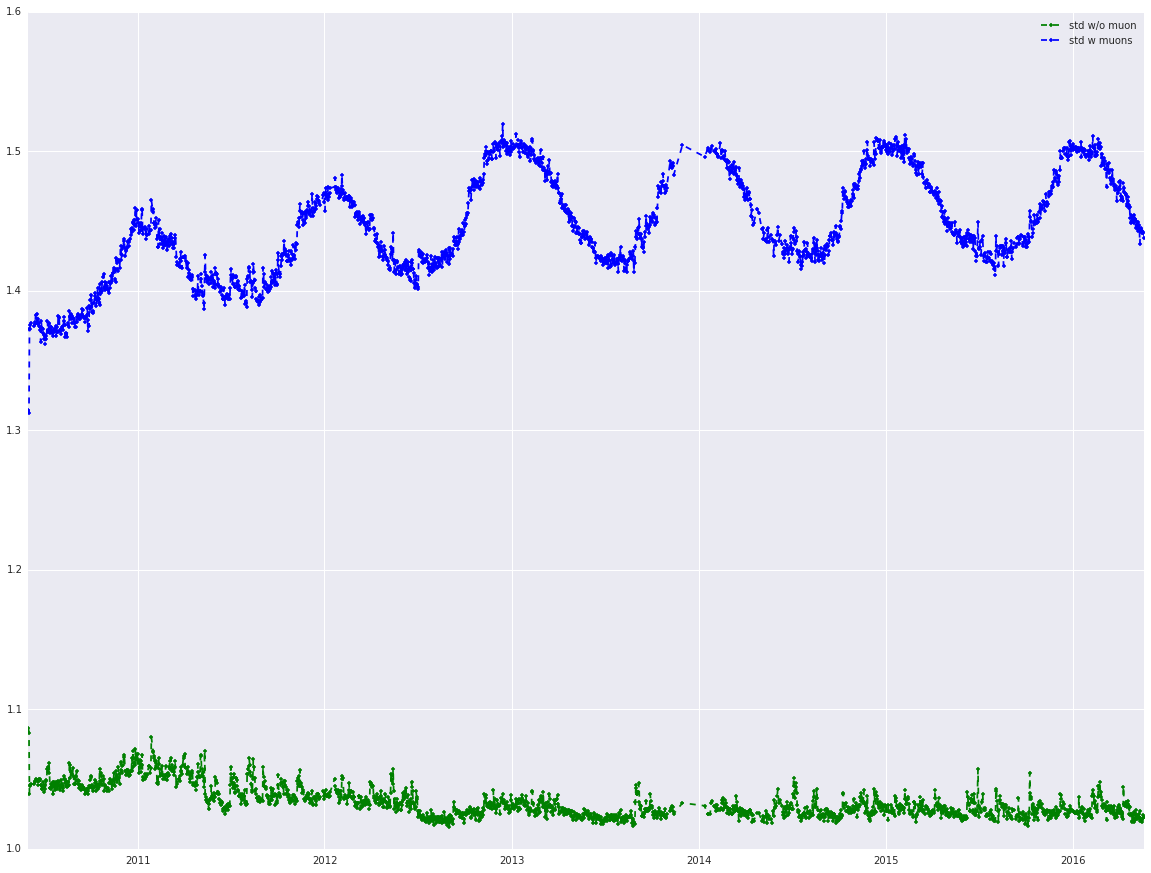

In [9]:
fig_std = plt.figure(figsize=(20,15))
ax1= fig_std.add_subplot(1,1,1)

ax1.plot(std_wo['day'], std_wo['std'], '.--g',  label= 'std w/o muon')
ax1.plot(std_w['day'], std_w['std'], '.--b',  label= 'std w muons')
ax1.legend(loc='best')

In [10]:
N_std_w = len(std_w)
N_std_wo = len(std_wo)

We are expecting a peak at: 1/(length of a year in days [cause days= 1 is our frequency]) 


In [13]:
float(1.0/365.4)

0.002736726874657909

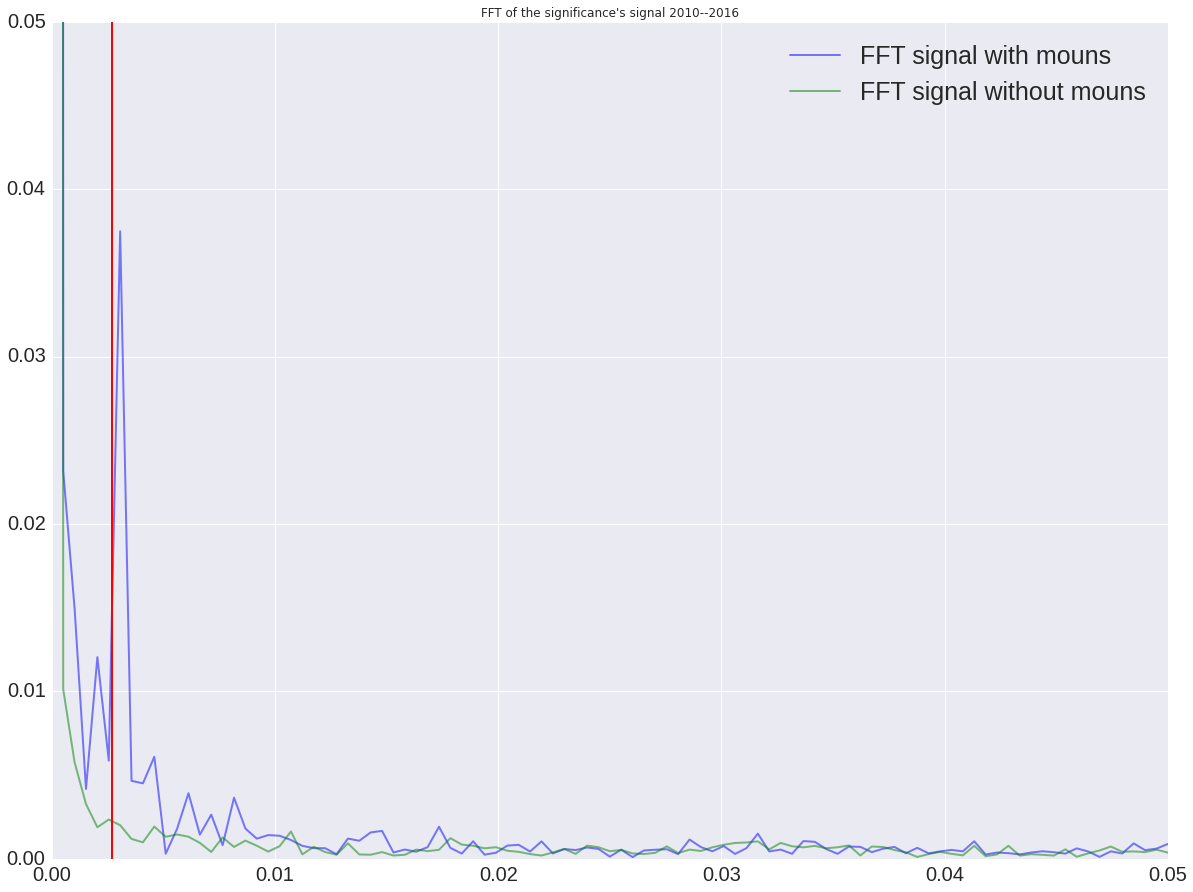

In [17]:

#calculating DFT (discrete fourier transform)
sig_fft_w = fft(std_w['std'].values)*2/N_std_w
sig_fft_wo = fft(std_wo['std'].values)*2/N_std_wo

plt.figure(figsize=(20,15))

freq = 0.5 # 0.5/day

Freq_range = np.linspace(0,freq,len(sig_fft_w)/2)
plt.plot(Freq_range,abs(sig_fft_w[0:len(sig_fft_w)//2]), color="blue", linewidth=2, label="FFT signal with mouns", alpha=0.5)
plt.plot(Freq_range,abs(sig_fft_wo[0:len(sig_fft_wo)//2]), color="green", linewidth=2 , label="FFT signal without mouns", alpha=0.5)

plt.axvline(x=0.0027, linewidth=2, color='r') #red line, is where we expect the peak for an infinite series
plt.title("FFT of the significance's signal 2010--2016")std
plt.legend(loc="best",prop={'size':25})
plt.ylim(0,0.05)
plt.xlim(0,0.05)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.show()